In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px

/Users/shikaili/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shikaili/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
price = pd.read_csv('price.csv')
df = pd.read_csv('train_df.csv') # 500 samples
test = pd.read_csv('test_df.csv')
df = df.iloc[ : ,1: ]
test = test.iloc[ : ,1: ]
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,164.524399,166.420303,169.140015,164.067810,163.849457,166.162201,165.993469,165.189468,160.593674,161.675629,...,155.412308,162.430008,156.484299,156.792023,158.300766,164.792419,155.610840,156.346420,151.157410,153.592850
1,166.420303,169.140015,164.067810,163.849457,166.162201,165.993469,165.189468,160.593674,161.675629,155.640594,...,162.430008,156.484299,156.792023,158.300766,164.792419,155.610840,156.346420,151.157410,153.592850,145.630417
2,169.140015,164.067810,163.849457,166.162201,165.993469,165.189468,160.593674,161.675629,155.640594,155.412308,...,156.484299,156.792023,158.300766,164.792419,155.610840,156.346420,151.157410,153.592850,145.630417,141.713791
3,164.067810,163.849457,166.162201,165.993469,165.189468,160.593674,161.675629,155.640594,155.412308,162.430008,...,156.792023,158.300766,164.792419,155.610840,156.346420,151.157410,153.592850,145.630417,141.713791,146.236801
4,163.849457,166.162201,165.993469,165.189468,160.593674,161.675629,155.640594,155.412308,162.430008,156.484299,...,158.300766,164.792419,155.610840,156.346420,151.157410,153.592850,145.630417,141.713791,146.236801,144.676102


In [3]:
X = df.iloc[:, :20]  # Select all rows and the first 20 columns
y = df.iloc[:, 20]  # Select all rows and the 21st column

X_test = test.iloc[:, :20]  # Select all rows and the first 20 columns
y_test = test.iloc[:, 20]  # Select all rows and the 21st column

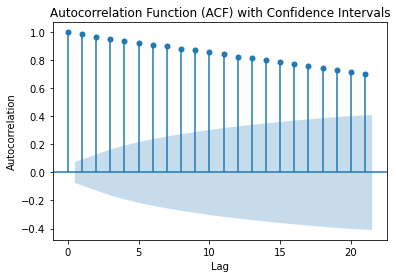

In [4]:
# Auto-correlation

# Calculate the ACF
ts = price['Adj Close']
plot_acf(ts, lags=21, alpha=0.05)

# Set plot labels and title
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) with Confidence Intervals')

# Show the plot
plt.show()

# suggest using all 20 features

In [5]:
def report_generator(predictions, y_test = y_test):
    #plot the prediction error
    error = predictions - y_test
    print('MAE: ', np.mean(abs(error)))
    print('RMSE:', np.sqrt(np.mean(error**2)))
    plt.plot(error)
    plt.xlabel('Sample')
    plt.ylabel('Error')
    plt.title('Error')
    plt.show()

    # Plot the predictions and the ground truth values
    plt.plot(predictions, label='Predictions', color='blue')
    plt.plot(y_test, label='Real', color='green')

    # Add labels and title to the plot
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title('Predictions vs. Real')

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()


In [6]:
# PCA

# Create the PCA instance
pca = PCA(n_components=2)  # Set the number of components you want to retain

# Fit the PCA model to the features (X)
pca.fit(X)

# Transform the features (X) to the lower-dimensional space
transformed_X = pca.transform(X)

# Create a new DataFrame to store the transformed features
features_pca = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print('Explained Variance Ratio:')
for i, ratio in enumerate(explained_variance_ratio):
    print(f'PC{i+1}: {ratio}')

# Print the transformed DataFrame (features)
print('Transformed Features (X):')
print(features_pca.head())

# Print the target variable (y)
print('Target Variable (y):')
print(y.head())

# suggest using 2 features which account for over 95% variance


Explained Variance Ratio:
PC1: 0.9540143227272367
PC2: 0.025811425659651884
Transformed Features (X):
          PC1       PC2
0 -133.741757 -2.733747
1 -134.238590 -0.125878
2 -133.914094  1.187483
3 -132.835958  2.522667
4 -130.907813  6.943407
Target Variable (y):
0    113.189468
1    113.081268
2    115.048401
3    122.356339
4    119.110550
Name: y, dtype: float64


In [7]:
# train (pca w/ linear regression)
lr_pca = LinearRegression()
lr_pca.fit(features_pca, y)


LinearRegression()

Features Selection: PCA   Model: Linear Regression
MAE:  4.558849147844878
RMSE: 5.613798056249263


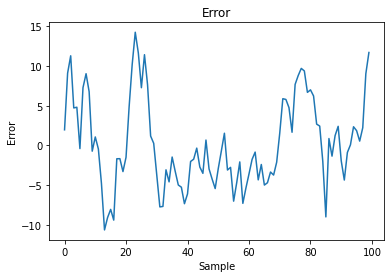

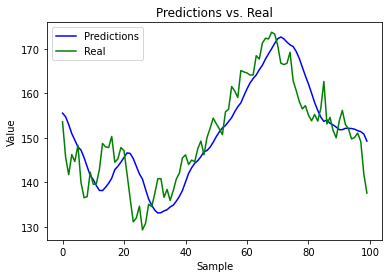

In [8]:
# test
X_test = test.iloc[:, :20]  # Select all rows and the first 20 columns
y_test = test.iloc[:, 20]  # Select all rows and the 21st column

# Transform the features (X) to the lower-dimensional space
transformed_X_test = pca.transform(X_test)

# Create a new DataFrame to store the transformed features
features_pca_test = pd.DataFrame(transformed_X_test, columns=['PC1', 'PC2'])
predictions = lr_pca.predict(features_pca_test)

print('Features Selection: PCA   Model: Linear Regression')
report_generator(predictions, y_test)


In [9]:
# recursive feature elimination (get 10 features)
# linear regression

# train

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Create a linear regression model
model = LinearRegression()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=10)  # Select the top 10 features

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
features_rfe = np.array(X)[:, rfe.support_]

# Train a model using only the selected features
lr_rfe = LinearRegression()
lr_rfe.fit(features_rfe, y)



LinearRegression()

In [10]:
rfe.support_


array([False,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True])

Features Selection: RFE   Model: Linear Regression
MAE:  2.5990769935661855
RMSE: 3.339387508176054


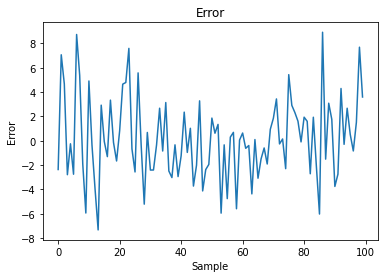

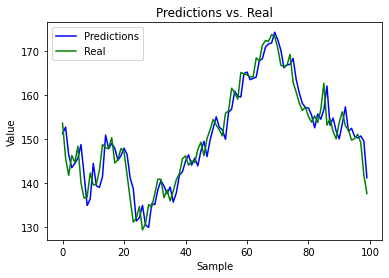

In [11]:
# test
X_test = test.iloc[:, :20]  # Select all rows and the first 20 columns
y_test = test.iloc[:, 20]  # Select all rows and the 21st column

features_rfe_test = np.array(X_test)[:, rfe.support_]
predictions = lr_rfe.predict(features_rfe_test)


print('Features Selection: RFE   Model: Linear Regression')
report_generator(predictions, y_test)

# shows lagging

In [12]:
# mutual information

# Assuming you have 20 past daily stock prices stored in a 2D array called `features`
# and the corresponding target values for each day stored in a 1D array called `target`

# Convert features and target to NumPy arrays
X_mi = np.array(X)
y_mi = np.array(y)

# Set the number of features to select
k = 6

# Perform feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=k)
features_mi = selector.fit_transform(X_mi, y_mi)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)




Selected Feature Indices: [14 15 16 17 18 19]


In [13]:
# train (mi w/ linear regression)

lr_mi = LinearRegression()
lr_mi.fit(features_mi, y)


LinearRegression()

Features Selection: Mutual Information   Model: Linear Regression
MAE:  2.598731179084465
RMSE: 3.3109708785950276


/Users/shikaili/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


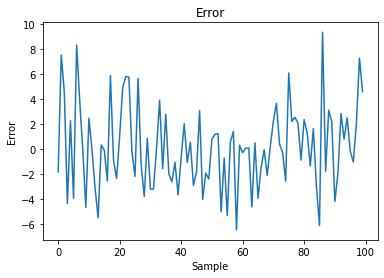

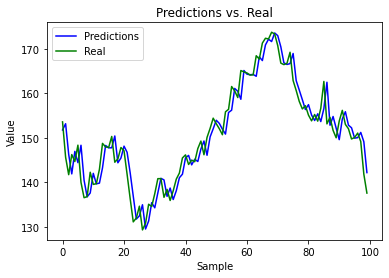

In [14]:
# test

X_test = test.iloc[:, :20]  # Select all rows and the first 20 columns
y_test = test.iloc[:, 20]  # Select all rows and the 21st column

features_mi_test = selector.transform(X_test)
predictions = lr_mi.predict(features_mi_test)


print('Features Selection: Mutual Information   Model: Linear Regression')
report_generator(predictions, y_test)

# shows lagging



Features Selection: Mutual Information   Model: XGBoost
MAE:  2.926647033691406
RMSE: 3.704923159661377


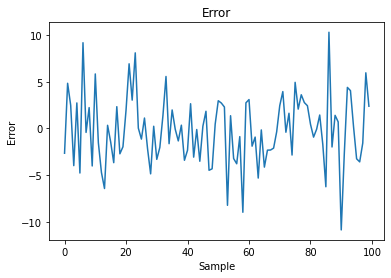

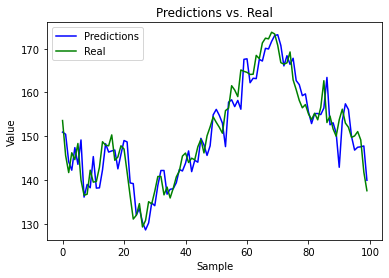

In [15]:
# train (mi w/ XGBoost)

# Create the XGBoost regression model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(features_mi, y_mi)

# Make predictions on the test data
predictions = model.predict(features_mi_test)

print('Features Selection: Mutual Information   Model: XGBoost')
report_generator(predictions, y_test)

Best Parameters: {'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
MAE:  2.510541534423828
RMSE: 3.2257755270659265


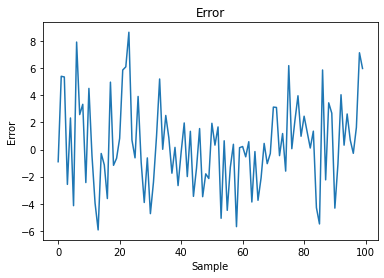

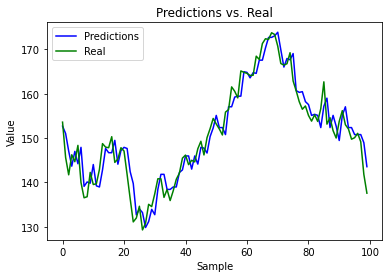

In [16]:
#hyper-parameters


# Create the XGBoost regression model
model = xgb.XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'eval_metric':['auc', 'logloss'],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2,3, 5, 7],
    'n_estimators': [50,100, 200, 300]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3)
grid_search.fit(features_mi, y_mi)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
predictions = best_model.predict(features_mi_test)


# Print the best parameters and the RMSE
print("Best Parameters:", best_params)
report_generator(predictions,y_test)
